In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
!pip install matplotlib

In [4]:
df=pd.read_csv('weight.csv')
df.head()

,weight,height
0,56,165
1,58,167
2,67,175
3,98,178
4,34,139


Text(0, 0.5, 'Height')

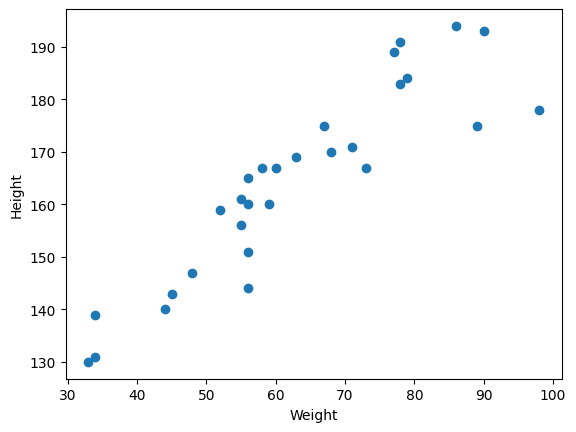

In [5]:
## scatter plot 
plt.scatter(df['weight'],df['height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
### co relation
df.corr()

,weight,height
weight,1.000000,0.907035
height,0.907035,1.000000


In [7]:
## seaborn for visulaliation
!pip install seaborn

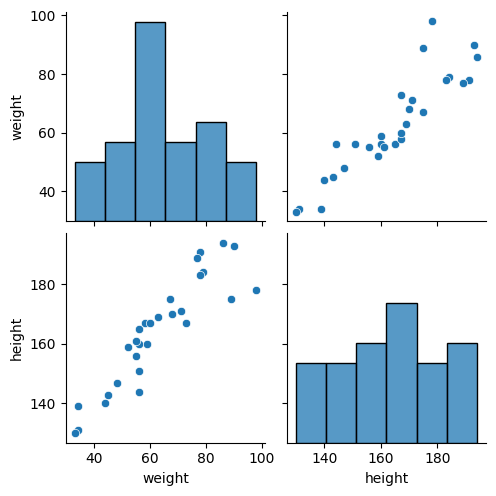

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
### first step 
## features into independent and depenedent features
### always make sure your independent feature in dataframe or 2-d array. 
# but for dependent label we can have series  
X=df[['weight']]
Y=df['height']

In [10]:
!pip install scikit-learn

In [11]:
# train test split 

from sklearn.model_selection import train_test_split


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [14]:
X_train.shape

(21, 1)

In [15]:
### standardization :- normalization 
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [17]:
# we do apply the fir_transform in test data.
X_test=scaler.transform(X_test)

In [18]:
X_test

array([[-0.08970184],
       [ 1.49020795],
       [-0.75812521],
       [ 0.82178458],
       [-1.18348554],
       [-1.00118826],
       [-1.91267467],
       [-0.51506217]])

In [19]:
## apply simple linear regression 

from sklearn.linear_model import LinearRegression


In [20]:
regression=LinearRegression(n_jobs=-1)

In [21]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [22]:
print("Coefficient or slope:- ",regression.coef_)
print("Intercept:- ",regression.intercept_)


Coefficient or slope:-  [16.23327684]
Intercept:-  166.0952380952381


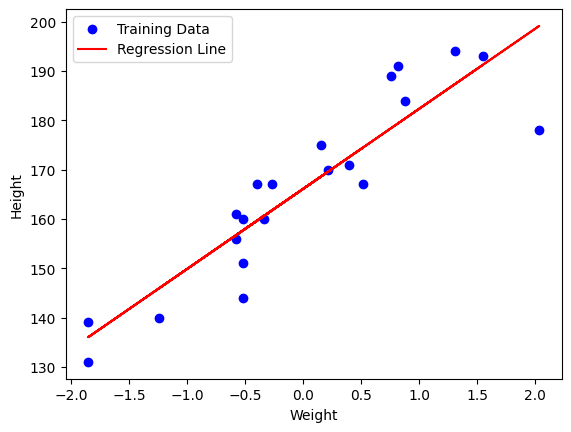

In [23]:
# plot the training data best fit line

plt.scatter(X_train,y_train,color='blue',label='Training Data')
plt.plot(X_train,regression.predict(X_train),color='red',label='Regression Line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

### prediction of test data
1. predicted height output:- intercept + coef_(Weights)
2. y_pred_test= 102.49 + 0.98(X_test)

In [24]:
# prediction for test data
y_pred=regression.predict(X_test)

In [25]:
# performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

49.24646631753165
5.932683451671238
7.017582654841456


In [27]:
from sklearn.metrics import r2_score

In [28]:
score=r2_score(y_test,y_pred)
print(score)

0.8216414552474661


In [29]:
### with ols linear regression
!pip install statsmodels

In [30]:

import statsmodels.api as sm

In [31]:
model=sm.OLS(y_train,X_train).fit()

In [32]:
prediction=model.predict(X_test)
print(prediction)

[ -1.45615477  24.19095823 -12.30685642  13.34025658 -19.21184838
 -16.25256611 -31.04897746  -8.36114673]


In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):             -0.040
Method:                 Least Squares   F-statistic:                             0.1906
Date:                Thu, 23 Jan 2025   Prob (F-statistic):                       0.667
Time:                        20:58:58   Log-Likelihood:                         -137.18
No. Observations:                  21   AIC:                                      276.4
Df Residuals:                      20   BIC:                                      277.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [35]:
# prediction for new data:- 
weight=int(input("Enter the weight you want:- "))
scaled_weight = scaler.transform([[weight]])  # Weight must be scaled
prediction = regression.predict(scaled_weight)
print(f"Predicted height for weight {weight} kg: {prediction[0]:.2f}")


Predicted height for weight 70 kg: 171.54


c:\Users\victus123\anaconda3\envs\my_conda_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
